In [1]:
#Importing the required libraries.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import io as spio
from scipy.signal import butter, filtfilt
from scipy.io import loadmat, savemat
import seaborn as sns
import scipy.stats as stats
import scipy.stats
from scipy.stats import skew,kurtosis
from scipy import fftpack
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm, metrics

## import dataset

In [2]:
#Storing text files in the defined matrices.

c=0
A=np.zeros([100, 4097])
B=np.zeros([100, 4097])
C=np.zeros([100, 4097])
D=np.zeros([100, 4097])
E=np.zeros([100, 4097])

for i in range(100):
    c=c+1
    if c<10:
        A[i, :]=np.loadtxt('C:/Users/USER/Desktop/dataset/A/Z/Z00'+str(c)+'.txt')
        B[i, :]=np.loadtxt('C:/Users/USER/Desktop/dataset/B/O/O00'+str(c)+'.txt')
        C[i, :]=np.loadtxt('C:/Users/USER/Desktop/dataset/C/N/N00'+str(c)+'.txt')
        D[i, :]=np.loadtxt('C:/Users/USER/Desktop/dataset/D/F/F00'+str(c)+'.txt')
        E[i, :]=np.loadtxt('C:/Users/USER/Desktop/dataset/E/S/S00'+str(c)+'.txt')
    elif c>=10 and c<100:
        A[i, :]=np.loadtxt('C:/Users/USER/Desktop/dataset/A/Z/Z0'+str(c)+'.txt')
        B[i, :]=np.loadtxt('C:/Users/USER/Desktop/dataset/B/O/O0'+str(c)+'.txt')
        C[i, :]=np.loadtxt('C:/Users/USER/Desktop/dataset/C/N/N0'+str(c)+'.txt')
        D[i, :]=np.loadtxt('C:/Users/USER/Desktop/dataset/D/F/F0'+str(c)+'.txt')
        E[i, :]=np.loadtxt('C:/Users/USER/Desktop/dataset/E/S/S0'+str(c)+'.txt')
    else:
        A[i, :]=np.loadtxt('C:/Users/USER/Desktop/dataset/A/Z/Z'+str(c)+'.txt')
        B[i, :]=np.loadtxt('C:/Users/USER/Desktop/dataset/B/O/O'+str(c)+'.txt')
        C[i, :]=np.loadtxt('C:/Users/USER/Desktop/dataset/C/N/N'+str(c)+'.txt')
        D[i, :]=np.loadtxt('C:/Users/USER/Desktop/dataset/D/F/F'+str(c)+'.txt')
        E[i, :]=np.loadtxt('C:/Users/USER/Desktop/dataset/E/S/S'+str(c)+'.txt')
    

In [3]:
#Saving the created dataset in a custom format.

spio.savemat('bon_dataset.mat',{'A':A,'B':B,'C':C,'D':D,'E':E})

In [4]:
#Loading data that has been saved in the MATLAB file format.
#and save them in "data"
data=spio.loadmat('bon_dataset.mat',{'A':A,'B':B,'C':C,'D':D,'E':E})


In [5]:
#The size of each matrix associated with the files.

print('A=',A.shape)
print('B=',B.shape)
print('C=',C.shape)
print('D=',D.shape)
print('E=',E.shape)

A= (100, 4097)
B= (100, 4097)
C= (100, 4097)
D= (100, 4097)
E= (100, 4097)


# FD

In [6]:
fs=173.61
data= spio.loadmat('bon_dataset.mat')
A= data['A']
B= data['B']
C= data['C']
D= data['D']
E= data['E']


bands=np.array([[0.1,4,8,12,30],[4,8,12,30,70]])

nf=4*bands.shape[1]
FeaturesAF= np.zeros([nf,A.shape[0]])
FeaturesBF= np.zeros([nf,B.shape[0]])
FeaturesCF= np.zeros([nf,C.shape[0]])
FeaturesDF= np.zeros([nf,D.shape[0]])
FeaturesEF= np.zeros([nf,E.shape[0]])
for i in range(A.shape[0]):
    sigA= A[i,:]
    sigB= B[i,:]
    sigC= C[i,:]
    sigD= D[i,:]
    sigE= E[i,:]
   
    
    n= A.shape[1]
    fx_a= fftpack.fft(sigA)
    fx_a= np.abs(fx_a)
    fx_a= fx_a[:round(n/2)]
    
    fx_b= fftpack.fft(sigB)
    fx_b= np.abs(fx_b)
    fx_b= fx_b[:round(n/2)]
    
    fx_c= fftpack.fft(sigC)
    fx_c= np.abs(fx_c)
    fx_c= fx_c[:round(n/2)]
    
    fx_d= fftpack.fft(sigD)
    fx_d= np.abs(fx_d)
    fx_d= fx_d[:round(n/2)]
    
    fx_e= fftpack.fft(sigE)
    fx_e= np.abs(fx_e)
    fx_e= fx_e[:round(n/2)]
    rf= np.linspace(0,fs/2,round(n/2))
    
    tempAF= np.zeros([4,bands.shape[1]])
    tempBF= np.zeros([4,bands.shape[1]])
    tempCF= np.zeros([4,bands.shape[1]])
    tempDF= np.zeros([4,bands.shape[1]])
    tempEF= np.zeros([4,bands.shape[1]])
    
    for j in range(bands.shape[1]):
        fl= bands[0,j]
        fh= bands[1,j]
        ind= np.nonzero(np.logical_and(rf>=fl,rf<fh))
        # print(ind)
        tempAF[:,j]=np.array([np.mean(fx_a[ind]),
                           np.var(fx_a[ind]),
                           skew(fx_a[ind]),
                           kurtosis(fx_a[ind])])
        
        tempBF[:,j]=np.array([np.mean(fx_b[ind]),
                           np.var(fx_b[ind]),
                           skew(fx_b[ind]),
                           kurtosis(fx_b[ind])])
        
        tempCF[:,j]=np.array([np.mean(fx_c[ind]),
                           np.var(fx_c[ind]),
                           skew(fx_c[ind]),
                           kurtosis(fx_c[ind])])
        
        tempDF[:,j]=np.array([np.mean(fx_d[ind]),
                           np.var(fx_d[ind]),
                           skew(fx_d[ind]),
                           kurtosis(fx_d[ind])])
        
        tempEF[:,j]=np.array([np.mean(fx_e[ind]),
                           np.var(fx_e[ind]),
                           skew(fx_e[ind]),
                           kurtosis(fx_e[ind])])

    FeaturesAF[:,i]= np.ravel(tempAF,'F')
    FeaturesBF[:,i]= np.ravel(tempBF,'F') 
    FeaturesCF[:,i]= np.ravel(tempCF,'F') 
    FeaturesDF[:,i]= np.ravel(tempDF,'F') 
    FeaturesEF[:,i]= np.ravel(tempEF,'F') 



spio.savemat('featuresFreq2.mat',{'FeaturesAF':FeaturesAF,
                                  'FeaturesBF':FeaturesBF,
                                  'FeaturesCF':FeaturesCF,
                                  'FeaturesDF':FeaturesDF,
                                  'FeaturesEF':FeaturesEF})  
        
FeaturesAF=np.transpose((FeaturesAF),(1,0))        
FeaturesBF=np.transpose((FeaturesBF),(1,0))        
FeaturesCF=np.transpose((FeaturesCF),(1,0))     
FeaturesDF=np.transpose((FeaturesDF),(1,0))     
FeaturesEF=np.transpose((FeaturesEF),(1,0))     
    
    
    
    


# KNN & SVM

In [7]:
import numpy as np
from scipy import io as spio
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import neighbors, svm
dataset=spio.loadmat('featuresFreq2.mat')
# dataset=spio.loadmat('featuresFreq2.mat')
data_f= np.concatenate([dataset['FeaturesAF'],
                      dataset['FeaturesBF'],
                      dataset['FeaturesCF'],
                      dataset['FeaturesDF'],
                      dataset['FeaturesEF']],axis=1)


data_f=np.transpose(data_f,(1,0))

output = np.concatenate([np.zeros([400]), 1*np.ones([100])], axis=0)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(data_f, output, test_size=0.2, random_state=42)

# knn classifier
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.3f}')


svm_model_rbf = svm.SVC(kernel='rbf', C=1.0)
svm_model_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_model_rbf.predict(X_test)
accuracy_svm_rbf = metrics.accuracy_score(y_test, y_pred_svm_rbf)
print(f'SVM with RBF Kernel Accuracy: {accuracy_svm_rbf:.3f}')



KNN Accuracy: 0.970
SVM with RBF Kernel Accuracy: 0.910


In [8]:
from sklearn import svm, metrics

# TD

In [9]:
import numpy as np
from scipy.signal import butter, filtfilt
from scipy.stats import skew, kurtosis
import scipy.io as spio

data = spio.loadmat('bon_dataset.mat')
A = data['A']
B = data['B']
C = data['C']
D = data['D']
E = data['E']


bands = {
    'DELTA': (0.5, 4),
    'THETA': (4, 8),
    'ALPHA': (8, 12),
    'BETA': (12, 30),
    'GAMMA': (30, 70)
}

# Sampling frequency
fs = 173.61

# Order of the filter
order = 3

# Nyquist frequency
nyq = 0.5 * fs

nf = 4*5
FeaturesA = np.zeros([nf, A.shape[0]])
FeaturesB = np.zeros([nf, B.shape[0]])
FeaturesC = np.zeros([nf, C.shape[0]])
FeaturesD = np.zeros([nf, D.shape[0]])
FeaturesE = np.zeros([nf, E.shape[0]])

# Calculate Butterworth filter coefficients for each band
filters = {}


for band_name in bands:
    lowcut, highcut = bands[band_name]
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    filters[band_name] = (b, a)

    for i in range(A.shape[0]):
        sigA = A[i, :]
        sigB = B[i, :]
        sigC = C[i, :]
        sigD = D[i, :]
        sigE = E[i, :]

        tempA = np.zeros([4, 5])
        tempB = np.zeros([4, 5])
        tempC = np.zeros([4, 5])
        tempD = np.zeros([4, 5])
        tempE = np.zeros([4, 5])

        # Apply the filter to the data for each band
        for band_name, (b, a) in filters.items():
            filtered_signal_A = filtfilt(b, a, sigA)
            filtered_signal_B = filtfilt(b, a, sigB)
            filtered_signal_C = filtfilt(b, a, sigC)
            filtered_signal_D = filtfilt(b, a, sigD)
            filtered_signal_E = filtfilt(b, a, sigE)


            for j in range(0, 5):
                tempA[:, j] = np.array([np.mean(filtered_signal_A),
                                        np.var(filtered_signal_A),
                                        skew(filtered_signal_A),
                                        kurtosis(filtered_signal_A)])

                tempB[:, j] = np.array([np.mean(filtered_signal_B),
                                        np.var(filtered_signal_B),
                                        skew(filtered_signal_B),
                                        kurtosis(filtered_signal_B)])

                tempC[:, j] = np.array([np.mean(filtered_signal_C),
                                        np.var(filtered_signal_C),
                                        skew(filtered_signal_C),
                                        kurtosis(filtered_signal_C)])

                tempD[:, j] = np.array([np.mean(filtered_signal_D),
                                        np.var(filtered_signal_D),
                                        skew(filtered_signal_D),
                                        kurtosis(filtered_signal_D)])

                tempE[:, j] = np.array([np.mean(filtered_signal_E),
                                        np.var(filtered_signal_E),
                                        skew(filtered_signal_E),
                                        kurtosis(filtered_signal_E)])

        FeaturesA[:, i] = np.ravel(tempA, 'F')
        FeaturesB[:, i] = np.ravel(tempB, 'F')
        FeaturesC[:, i] = np.ravel(tempC, 'F')
        FeaturesD[:, i] = np.ravel(tempD, 'F')
        FeaturesE[:, i] = np.ravel(tempE, 'F')


spio.savemat('featuresTime.mat', {'FeaturesA': FeaturesA,
                                  'FeaturesB': FeaturesB,
                                  'FeaturesC': FeaturesC,
                                  'FeaturesD': FeaturesD,
                                  'FeaturesE': FeaturesE})

FeaturesA = np.transpose(FeaturesA, (1, 0))
FeaturesB = np.transpose(FeaturesB, (1, 0))
FeaturesC = np.transpose(FeaturesC, (1, 0))
FeaturesD = np.transpose(FeaturesD, (1, 0))
FeaturesE = np.transpose(FeaturesE, (1, 0))

print(FeaturesA.shape)
print(FeaturesB.shape)
print(FeaturesC.shape)
print(FeaturesD.shape)
print(FeaturesE.shape)

(100, 20)
(100, 20)
(100, 20)
(100, 20)
(100, 20)


# KNN & SVM

In [10]:
import numpy as np
from scipy import io as spio
from sklearn import neighbors, svm
from sklearn import metrics
from sklearn.model_selection import train_test_split

# load data
dataset = spio.loadmat('featuresTime.mat')
data_t = np.concatenate([
    dataset['FeaturesA'],
    dataset['FeaturesB'],
    dataset['FeaturesC'],
    dataset['FeaturesD'],
    dataset['FeaturesE']], axis=1)

data_t=np.transpose(data_t,(1,0))
# create labels
output = np.concatenate([np.zeros([400]), 1*np.ones([100])], axis=0)


# train/test split
X_train, X_test, y_train, y_test = train_test_split(data_t, output, test_size=0.2, random_state=42)


# knn classifier
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.3f}')

# svm classifier
svm_model = svm.SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.3f}')



KNN Accuracy: 0.940
SVM Accuracy: 0.890


# TFD

In [11]:
#!pip install PyWavelets

import pywt

In [12]:

# Sampling frequencies
new_sampling_frequency = 120.0#hz

# Load the dataset
data = spio.loadmat('bon_dataset.mat')
A = data['A']
B = data['B']
C = data['C']
D = data['D']
E = data['E']



In [13]:
coff_A=pywt.wavedec(A,'db6',level=4)
coff_B=pywt.wavedec(B,'db6',level=4)
coff_C=pywt.wavedec(C,'db6',level=4)
coff_D=pywt.wavedec(D,'db6',level=4)
coff_E=pywt.wavedec(E,'db6',level=4)

In [14]:
len(coff_A)

5

In [15]:
nf = 4*5
FeaturesA_WD = np.zeros([nf, A.shape[0]])
FeaturesB_WD = np.zeros([nf, B.shape[0]])
FeaturesC_WD = np.zeros([nf, C.shape[0]])
FeaturesD_WD = np.zeros([nf, D.shape[0]])
FeaturesE_WD = np.zeros([nf, E.shape[0]])

for i in range(A.shape[0]):
    sigA = A[i, :]
    sigB = B[i, :]
    sigC = C[i, :]
    sigD = D[i, :]
    sigE = E[i, :]

    tempA_WD = np.zeros([4, 5])
    tempB_WD = np.zeros([4, 5])
    tempC_WD = np.zeros([4, 5])
    tempD_WD = np.zeros([4, 5])
    tempE_WD = np.zeros([4, 5])

    # Apply the Wavelet transform 
    coff_A = pywt.wavedec(sigA, 'db6', level=4)
    coff_B = pywt.wavedec(sigB, 'db6', level=4)     
    coff_C = pywt.wavedec(sigC, 'db6', level=4) 
    coff_D = pywt.wavedec(sigD, 'db6', level=4)
    coff_E = pywt.wavedec(sigE, 'db6', level=4)
    

    for j in range(0, 5):
        tempA_WD[:, j] = np.array([np.mean(coff_A[j]),
                                    np.var(coff_A[j]),
                                    skew(coff_A[j]),
                                    kurtosis(coff_A[j])])

        tempB_WD[:, j] = np.array([np.mean(coff_B[j]),
                                        np.var(coff_B[j]),
                                        skew(coff_B[j]),
                                        kurtosis(coff_B[j])])

        tempC_WD[:, j] = np.array([np.mean(coff_C[j]),
                                        np.var(coff_C[j]),
                                        skew(coff_C[j]),
                                        kurtosis(coff_C[j])])

        tempD_WD[:, j] = np.array([np.mean(coff_D[j]),
                                        np.var(coff_D[j]),
                                        skew(coff_D[j]),
                                        kurtosis(coff_D[j])])

        tempE_WD[:, j] = np.array([np.mean(coff_E[j]),
                                        np.var(coff_E[j]),
                                        skew(coff_E[j]),
                                        kurtosis(coff_E[j])])

    FeaturesA_WD[:, i] = np.ravel(tempA_WD, 'F')
    FeaturesB_WD[:, i] = np.ravel(tempB_WD, 'F')
    FeaturesC_WD[:, i] = np.ravel(tempC_WD, 'F')
    FeaturesD_WD[:, i] = np.ravel(tempD_WD, 'F')
    FeaturesE_WD[:, i] = np.ravel(tempE_WD, 'F')


spio.savemat('features_WD.mat', {'FeaturesA_WD': FeaturesA_WD,
                                  'FeaturesB_WD': FeaturesB_WD,
                                  'FeaturesC_WD': FeaturesC_WD,
                                  'FeaturesD_WD': FeaturesD_WD,
                                  'FeaturesE_WD': FeaturesE_WD})

FeaturesA_WD = np.transpose(FeaturesA_WD, (1, 0))
FeaturesB_WD = np.transpose(FeaturesB_WD, (1, 0))
FeaturesC_WD = np.transpose(FeaturesC_WD, (1, 0))
FeaturesD_WD = np.transpose(FeaturesD_WD, (1, 0))
FeaturesE_WD = np.transpose(FeaturesE_WD, (1, 0))

print(FeaturesA_WD.shape)
print(FeaturesB_WD.shape)
print(FeaturesC_WD.shape)
print(FeaturesD_WD.shape)
print(FeaturesE_WD.shape)


(100, 20)
(100, 20)
(100, 20)
(100, 20)
(100, 20)


# KNN & SVM

In [16]:
import numpy as np
from scipy import io as spio
from sklearn import neighbors
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split


# load data
dataset = spio.loadmat('features_WD.mat')
data_w = np.concatenate([
    dataset['FeaturesA_WD'],
    dataset['FeaturesB_WD'],
    dataset['FeaturesC_WD'],
    dataset['FeaturesD_WD'],
    dataset['FeaturesE_WD']], axis=1)
data_w=np.transpose(data_w,(1,0))
# create labels

output = np.concatenate([np.zeros([400]), 1*np.ones([100])], axis=0)


# train/test split
X_train, X_test, y_train, y_test = train_test_split(data_w, output, test_size=0.2, random_state=42)


# knn classifier
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.3f}')

# svm classifier
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.3f}')



KNN Accuracy: 0.950
SVM Accuracy: 0.920


# t_test

In [17]:
a_matrix = np.concatenate((FeaturesA,FeaturesAF,FeaturesA_WD),axis=1)
b_matrix = np.concatenate((FeaturesB,FeaturesBF,FeaturesB_WD),axis=1)
c_matrix = np.concatenate((FeaturesC,FeaturesCF,FeaturesC_WD),axis=1)
d_matrix = np.concatenate((FeaturesD,FeaturesDF,FeaturesD_WD),axis=1)
e_matrix = np.concatenate((FeaturesE,FeaturesEF,FeaturesE_WD),axis=1)

In [18]:
e_matrix.shape

(100, 60)

In [19]:
feature_matrix = np.concatenate((a_matrix,b_matrix,c_matrix,d_matrix,e_matrix),axis=0)
feature_matrix.shape

(500, 60)

In [20]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, output, test_size=0.2, random_state=42)


# knn classifier
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.3f}')

# svm classifier
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.3f}')



KNN Accuracy: 0.970
SVM Accuracy: 0.910


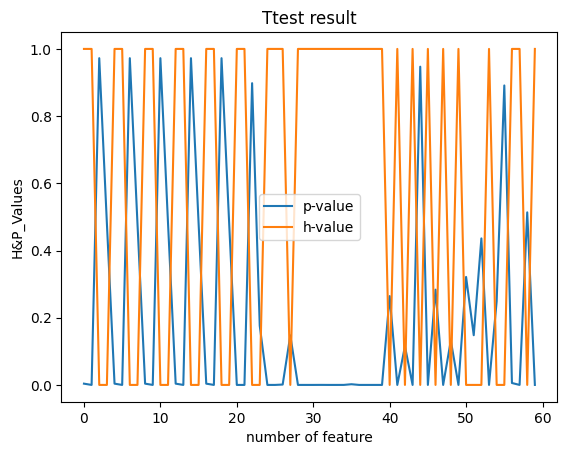

In [21]:
import numpy as np
from scipy.stats import ttest_ind
p_values = []
h_values = []
good_features = []
n_feature_matrix = np.zeros([500, 36])

for j in range(feature_matrix.shape[1]):
    seizure_data = feature_matrix[400:499,j]
    normal_data = feature_matrix[:400,j]
    
    t_stat, p_value = ttest_ind(seizure_data, normal_data)
    p_values.append(p_value)
    
    # محاسبه H-value
    if p_value < 0.05:
        h_value = 1
        good_features.append(j)
    else:
        h_value = 0
    
    h_values.append(h_value)
len(good_features)

for i in range(feature_matrix.shape[0]):
    n_feature_matrix[i] = feature_matrix[i, good_features]


plt.plot(p_values, label='p-value')
plt.plot(h_values, label='h-value')
plt.xlabel('number of feature')
plt.ylabel('H&P_Values')
plt.title('Ttest result')
plt.legend()
plt.show()


In [22]:
n_feature_matrix.shape

(500, 36)

# sffs

In [23]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier


data = load_iris()
X = n_feature_matrix
y = np.concatenate([np.zeros([400]), 1*np.ones([100])], axis=0)


sffs = SequentialFeatureSelector(KNeighborsClassifier(), n_features_to_select=5)


selected_features = sffs.fit_transform(X, y)


print("Selected feature indices:", sffs.get_support(indices=True))


Selected feature indices: [ 0  1  2 12 19]


In [24]:
the_end_feature_matrix =selected_features
the_end_feature_matrix.shape

(500, 5)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(the_end_feature_matrix, y, test_size=0.2, random_state=42)

# Fitting a k-NN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Fitting an SVM model
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# Making predictions on the testing set
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)

# Evaluating the models
knn_accuracy = accuracy_score(y_test, knn_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

print("k-NN Accuracy:", knn_accuracy)
print("SVM Accuracy:", svm_accuracy)

# Calculating confusion matrices
knn_cm = confusion_matrix(y_test, knn_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

print("Confusion Matrix (k-NN):")
print(knn_cm)

print("Confusion Matrix (SVM):")
print(svm_cm)



k-NN Accuracy: 0.97
SVM Accuracy: 0.97
Confusion Matrix (k-NN):
[[75  1]
 [ 2 22]]
Confusion Matrix (SVM):
[[76  0]
 [ 3 21]]


# time domain classification by KNN

In [26]:
import numpy as np
from scipy import io as spio
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

# Load dataset
dataset = spio.loadmat('featuresTime.mat')

# Extract features and labels
data1 = np.concatenate([dataset['FeaturesA']], axis=1)
data2 = np.concatenate([dataset['FeaturesE']], axis=1)

data = np.concatenate([data1, data2], axis=1) 
data = np.transpose(data)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                         np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, output, test_size=0.3, random_state=42)
# knn classifier
knn_model = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.3f}')

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)

from sklearn import svm

# Define SVM model
svm_model = svm.SVC(kernel='linear')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)


KNN Accuracy: 0.850
KNN Classification Results:
Accuracy: 0.85
Specificity: 0.7241379310344828
Sensitivity (Recall): 0.7241379310344828
Confusion Matrix:
[[30  1]
 [ 8 21]]
SVM Classification Results:
Accuracy: 0.9333333333333333
Specificity: 0.896551724137931
Sensitivity (Recall): 0.896551724137931
Confusion Matrix:
[[30  1]
 [ 3 26]]


C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
import numpy as np
from scipy import io as spio
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

# Load dataset
dataset = spio.loadmat('featuresTime.mat')

# Extract features and labels
data1 = np.concatenate([dataset['FeaturesB']], axis=1)
data2 = np.concatenate([dataset['FeaturesE']], axis=1)

data_b = np.concatenate([data1, data2], axis=1) 
data_b  = np.transpose(data_b)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                         np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_b , output, test_size=0.2, random_state=42)


knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)

from sklearn import svm

# Define SVM model
svm_model = svm.SVC(kernel='linear')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)


KNN Classification Results:
Accuracy: 0.85
Specificity: 0.7894736842105263
Sensitivity (Recall): 0.7894736842105263
Confusion Matrix:
[[19  2]
 [ 4 15]]
SVM Classification Results:
Accuracy: 0.725
Specificity: 0.5789473684210527
Sensitivity (Recall): 0.5789473684210527
Confusion Matrix:
[[18  3]
 [ 8 11]]


C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
import numpy as np
from scipy import io as spio
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

# Load dataset
dataset = spio.loadmat('featuresTime.mat')

# Extract features and labels
data1 = np.concatenate([dataset['FeaturesC']], axis=1)
data2 = np.concatenate([dataset['FeaturesE']], axis=1)

data = np.concatenate([data1, data2], axis=1) 
data = np.transpose(data)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                         np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, output, test_size=0.2, random_state=42)

# SVM Classifier
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)

from sklearn import svm

# Define SVM model
svm_model = svm.SVC(kernel='linear')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)


C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNN Classification Results:
Accuracy: 0.9
Specificity: 0.8421052631578947
Sensitivity (Recall): 0.8421052631578947
Confusion Matrix:
[[20  1]
 [ 3 16]]
SVM Classification Results:
Accuracy: 0.775
Specificity: 0.7368421052631579
Sensitivity (Recall): 0.7368421052631579
Confusion Matrix:
[[17  4]
 [ 5 14]]


In [29]:
import numpy as np
from scipy import io as spio
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

# Load dataset
dataset = spio.loadmat('featuresTime.mat')

# Extract features and labels
data1 = np.concatenate([dataset['FeaturesD']], axis=1)
data2 = np.concatenate([dataset['FeaturesE']], axis=1)

data = np.concatenate([data1, data2], axis=1) 
data = np.transpose(data)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                          np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, output, test_size=0.3, random_state=42)

# SVM Classifier
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)

from sklearn import svm

# Define SVM model
svm_model = svm.SVC(kernel='linear')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)


KNN Classification Results:
Accuracy: 0.8666666666666667
Specificity: 0.7931034482758621
Sensitivity (Recall): 0.7931034482758621
Confusion Matrix:
[[29  2]
 [ 6 23]]
SVM Classification Results:
Accuracy: 0.8666666666666667
Specificity: 0.7241379310344828
Sensitivity (Recall): 0.7241379310344828
Confusion Matrix:
[[31  0]
 [ 8 21]]


C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
import numpy as np
from scipy import io as spio
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

# Load dataset
dataset = spio.loadmat('featuresTime.mat')

# Extract features and labels
data1 = np.concatenate([dataset['FeaturesA'],dataset['FeaturesB'],], axis=1)
data2 = np.concatenate([dataset['FeaturesC'],dataset['FeaturesD']], axis=1)

data = np.concatenate([data1, data2], axis=1) 
data = np.transpose(data)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                          np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, output, test_size=0.2, random_state=42)

# SVM Classifier
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)
from sklearn import svm

# Define SVM model
svm_model = svm.SVC(kernel='linear')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)


KNN Classification Results:
Accuracy: 0.7625
Specificity: 0.6388888888888888
Sensitivity (Recall): 0.6388888888888888
Confusion Matrix:
[[38  6]
 [13 23]]
SVM Classification Results:
Accuracy: 0.55
Specificity: 0.9166666666666666
Sensitivity (Recall): 0.9166666666666666
Confusion Matrix:
[[11 33]
 [ 3 33]]


C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# ferq domain classification by KNN

In [31]:
dataset=spio.loadmat('featuresFreq2.mat')
# dataset=spio.loadmat('featuresFreq2.mat')
data_f= np.concatenate([dataset['FeaturesAF'],
                      dataset['FeaturesBF'],
                      dataset['FeaturesCF'],
                      dataset['FeaturesDF'],
                      dataset['FeaturesEF']],axis=1)




# Extract features and labels
data1 = np.concatenate([dataset['FeaturesAF']], axis=1)
data2 = np.concatenate([dataset['FeaturesEF']], axis=1)

data = np.concatenate([data1, data2], axis=1) 
data = np.transpose(data)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                         np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, output, test_size=0.3, random_state=42)
# knn classifier
knn_model = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.3f}')

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)

from sklearn import svm

# Define SVM model
svm_model = svm.SVC(kernel='linear')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)


KNN Accuracy: 1.000
KNN Classification Results:
Accuracy: 1.0
Specificity: 1.0
Sensitivity (Recall): 1.0
Confusion Matrix:
[[31  0]
 [ 0 29]]
SVM Classification Results:
Accuracy: 1.0
Specificity: 1.0
Sensitivity (Recall): 1.0
Confusion Matrix:
[[31  0]
 [ 0 29]]


C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:

dataset=spio.loadmat('featuresFreq2.mat')
# dataset=spio.loadmat('featuresFreq2.mat')
data_f= np.concatenate([dataset['FeaturesAF'],
                      dataset['FeaturesBF'],
                      dataset['FeaturesCF'],
                      dataset['FeaturesDF'],
                      dataset['FeaturesEF']],axis=1)

# Extract features and labels
data1 = np.concatenate([dataset['FeaturesBF']], axis=1)
data2 = np.concatenate([dataset['FeaturesEF']], axis=1)

data_b = np.concatenate([data1, data2], axis=1) 
data_b  = np.transpose(data_b)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                         np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_b , output, test_size=0.2, random_state=42)


knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)

from sklearn import svm

# Define SVM model
svm_model = svm.SVC(kernel='linear')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)


KNN Classification Results:
Accuracy: 1.0
Specificity: 1.0
Sensitivity (Recall): 1.0
Confusion Matrix:
[[21  0]
 [ 0 19]]
SVM Classification Results:
Accuracy: 1.0
Specificity: 1.0
Sensitivity (Recall): 1.0
Confusion Matrix:
[[21  0]
 [ 0 19]]


C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:

dataset=spio.loadmat('featuresFreq2.mat')
# dataset=spio.loadmat('featuresFreq2.mat')
data_f= np.concatenate([dataset['FeaturesAF'],
                      dataset['FeaturesBF'],
                      dataset['FeaturesCF'],
                      dataset['FeaturesDF'],
                      dataset['FeaturesEF']],axis=1)

# Extract features and labels
data1 = np.concatenate([dataset['FeaturesCF']], axis=1)
data2 = np.concatenate([dataset['FeaturesEF']], axis=1)

data = np.concatenate([data1, data2], axis=1) 
data = np.transpose(data)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                         np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, output, test_size=0.2, random_state=42)

# SVM Classifier
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)

from sklearn import svm

# Define SVM model
svm_model = svm.SVC(kernel='linear')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)


KNN Classification Results:
Accuracy: 1.0
Specificity: 1.0
Sensitivity (Recall): 1.0
Confusion Matrix:
[[21  0]
 [ 0 19]]
SVM Classification Results:
Accuracy: 0.95
Specificity: 0.8947368421052632
Sensitivity (Recall): 0.8947368421052632
Confusion Matrix:
[[21  0]
 [ 2 17]]


C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
dataset=spio.loadmat('featuresFreq2.mat')
# dataset=spio.loadmat('featuresFreq2.mat')
data_f= np.concatenate([dataset['FeaturesAF'],
                      dataset['FeaturesBF'],
                      dataset['FeaturesCF'],
                      dataset['FeaturesDF'],
                      dataset['FeaturesEF']],axis=1)



# Extract features and labels
data1 = np.concatenate([dataset['FeaturesDF']], axis=1)
data2 = np.concatenate([dataset['FeaturesEF']], axis=1)

data = np.concatenate([data1, data2], axis=1) 
data = np.transpose(data)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                          np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, output, test_size=0.3, random_state=42)

# SVM Classifier
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)

from sklearn import svm



KNN Classification Results:
Accuracy: 0.8833333333333333
Specificity: 0.7931034482758621
Sensitivity (Recall): 0.7931034482758621
Confusion Matrix:
[[30  1]
 [ 6 23]]


C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [35]:
# Define SVM model
svm_model = svm.SVC(kernel='rbf')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)



SVM Classification Results:
Accuracy: 0.8333333333333334
Specificity: 0.6896551724137931
Sensitivity (Recall): 0.6896551724137931
Confusion Matrix:
[[30  1]
 [ 9 20]]


C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
# Load dataset
dataset=spio.loadmat('featuresFreq2.mat')
# dataset=spio.loadmat('featuresFreq2.mat')
data_f= np.concatenate([dataset['FeaturesAF'],
                      dataset['FeaturesBF'],
                      dataset['FeaturesCF'],
                      dataset['FeaturesDF'],
                      dataset['FeaturesEF']],axis=1)





# Extract features and labels
data1 = np.concatenate([dataset['FeaturesAF'],dataset['FeaturesBF'],], axis=1)
data2 = np.concatenate([dataset['FeaturesCF'],dataset['FeaturesDF']], axis=1)

data = np.concatenate([data1, data2], axis=1) 
data = np.transpose(data)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                          np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, output, test_size=0.2, random_state=42)

# SVM Classifier
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)
from sklearn import svm



KNN Classification Results:
Accuracy: 0.9
Specificity: 0.9166666666666666
Sensitivity (Recall): 0.9166666666666666
Confusion Matrix:
[[39  5]
 [ 3 33]]


C:\Users\USER\anaconda3\envs\mj\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:

# Define SVM model
svm_model = svm.SVC(kernel='rbf')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)


# TIME ferq domain classification by KNN

In [ ]:
# load data
dataset = spio.loadmat('features_WD.mat')
data_w = np.concatenate([
    dataset['FeaturesA_WD'],
    dataset['FeaturesB_WD'],
    dataset['FeaturesC_WD'],
    dataset['FeaturesD_WD'],
    dataset['FeaturesE_WD']], axis=1)


# Extract features and labels
data1 = np.concatenate([dataset['FeaturesA_WD']], axis=1)
data2 = np.concatenate([dataset['FeaturesE_WD']], axis=1)

data = np.concatenate([data1, data2], axis=1) 
data = np.transpose(data)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                         np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, output, test_size=0.3, random_state=42)
# knn classifier
knn_model = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.3f}')

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)

from sklearn import svm

# Define SVM model
svm_model = svm.SVC(kernel='linear')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)


In [ ]:
# load data
dataset = spio.loadmat('features_WD.mat')
data_w = np.concatenate([
    dataset['FeaturesA_WD'],
    dataset['FeaturesB_WD'],
    dataset['FeaturesC_WD'],
    dataset['FeaturesD_WD'],
    dataset['FeaturesE_WD']], axis=1)

# Extract features and labels
data1 = np.concatenate([dataset['FeaturesB_WD']], axis=1)
data2 = np.concatenate([dataset['FeaturesE_WD']], axis=1)

data_b = np.concatenate([data1, data2], axis=1) 
data_b  = np.transpose(data_b)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                         np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_b , output, test_size=0.2, random_state=42)


knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)
from sklearn import svm

# Define SVM model
svm_model = svm.SVC(kernel='linear')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)


In [ ]:
# load data
dataset = spio.loadmat('features_WD.mat')
data_w = np.concatenate([
    dataset['FeaturesA_WD'],
    dataset['FeaturesB_WD'],
    dataset['FeaturesC_WD'],
    dataset['FeaturesD_WD'],
    dataset['FeaturesE_WD']], axis=1)
# Extract features and labels
data1 = np.concatenate([dataset['FeaturesC_WD']], axis=1)
data2 = np.concatenate([dataset['FeaturesE_WD']], axis=1)

data = np.concatenate([data1, data2], axis=1) 
data = np.transpose(data)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                         np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, output, test_size=0.2, random_state=42)

# SVM Classifier
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)

from sklearn import svm

# Define SVM model
svm_model = svm.SVC(kernel='linear')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)


In [ ]:
# load data
dataset = spio.loadmat('features_WD.mat')
data_w = np.concatenate([
    dataset['FeaturesA_WD'],
    dataset['FeaturesB_WD'],
    dataset['FeaturesC_WD'],
    dataset['FeaturesD_WD'],
    dataset['FeaturesE_WD']], axis=1)

# Extract features and labels
data1 = np.concatenate([dataset['FeaturesC_WD']], axis=1)
data2 = np.concatenate([dataset['FeaturesE_WD']], axis=1)

data_b = np.concatenate([data1, data2], axis=1) 
data_b  = np.transpose(data_b)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                         np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_b , output, test_size=0.2, random_state=42)


knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)
from sklearn import svm

# Define SVM model
svm_model = svm.SVC(kernel='linear')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)


In [ ]:
# load data
dataset = spio.loadmat('features_WD.mat')
data_w = np.concatenate([
    dataset['FeaturesA_WD'],
    dataset['FeaturesB_WD'],
    dataset['FeaturesC_WD'],
    dataset['FeaturesD_WD'],
    dataset['FeaturesE_WD']], axis=1)
# Extract features and labels
data1 = np.concatenate([dataset['FeaturesD_WD']], axis=1)
data2 = np.concatenate([dataset['FeaturesE_WD']], axis=1)

data_b = np.concatenate([data1, data2], axis=1) 
data_b  = np.transpose(data_b)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                         np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_b , output, test_size=0.2, random_state=42)


knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)
from sklearn import svm

# Define SVM model
svm_model = svm.SVC(kernel='linear')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)


In [ ]:
# load data
dataset = spio.loadmat('features_WD.mat')
data_w = np.concatenate([
    dataset['FeaturesA_WD'],
    dataset['FeaturesB_WD'],
    dataset['FeaturesC_WD'],
    dataset['FeaturesD_WD'],
    dataset['FeaturesE_WD']], axis=1)



# Extract features and labels
data1 = np.concatenate([dataset['FeaturesA_WD'],dataset['FeaturesB_WD'],], axis=1)
data2 = np.concatenate([dataset['FeaturesC_WD'],dataset['FeaturesD_WD']], axis=1)

data = np.concatenate([data1, data2], axis=1) 
data = np.transpose(data)
output = np.concatenate([np.zeros([1, data1.shape[1]]),
                          np.ones([1, data2.shape[1]])], axis=1)
output = np.transpose(output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, output, test_size=0.2, random_state=42)

# SVM Classifier
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Calculate performance metrics for KNN Classifier
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
knn_specificity = metrics.recall_score(y_test, y_pred_knn, pos_label=1)
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

# Print KNN Classification Results
print("KNN Classification Results:")
print("Accuracy:", knn_accuracy)
print("Specificity:", knn_specificity)
print("Sensitivity (Recall):", knn_recall)
print("Confusion Matrix:")
print(knn_confusion_matrix)


from sklearn import svm

# Define SVM model
svm_model = svm.SVC(kernel='linear')

# Train model on training data
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred_svm = svm_model.predict(X_test)

# Calculate SVM model accuracy
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate other performance metrics for SVM model
svm_precision = metrics.precision_score(y_test, y_pred_svm)
svm_recall = metrics.recall_score(y_test, y_pred_svm)
svm_specificity = metrics.recall_score(y_test, y_pred_svm, pos_label=1)
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Print SVM Classification Results
print("SVM Classification Results:")
print("Accuracy:", accuracy_svm)
print("Specificity:", svm_specificity)
print("Sensitivity (Recall):", svm_recall)
print("Confusion Matrix:")
print(svm_confusion_matrix)
